# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Felipe Pérez Silva

* __Rol__: 201610530-4

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scriptsm, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import os
import numpy as np
from PIL import Image

In [2]:
gatito = Image.open(os.path.join("images", "gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

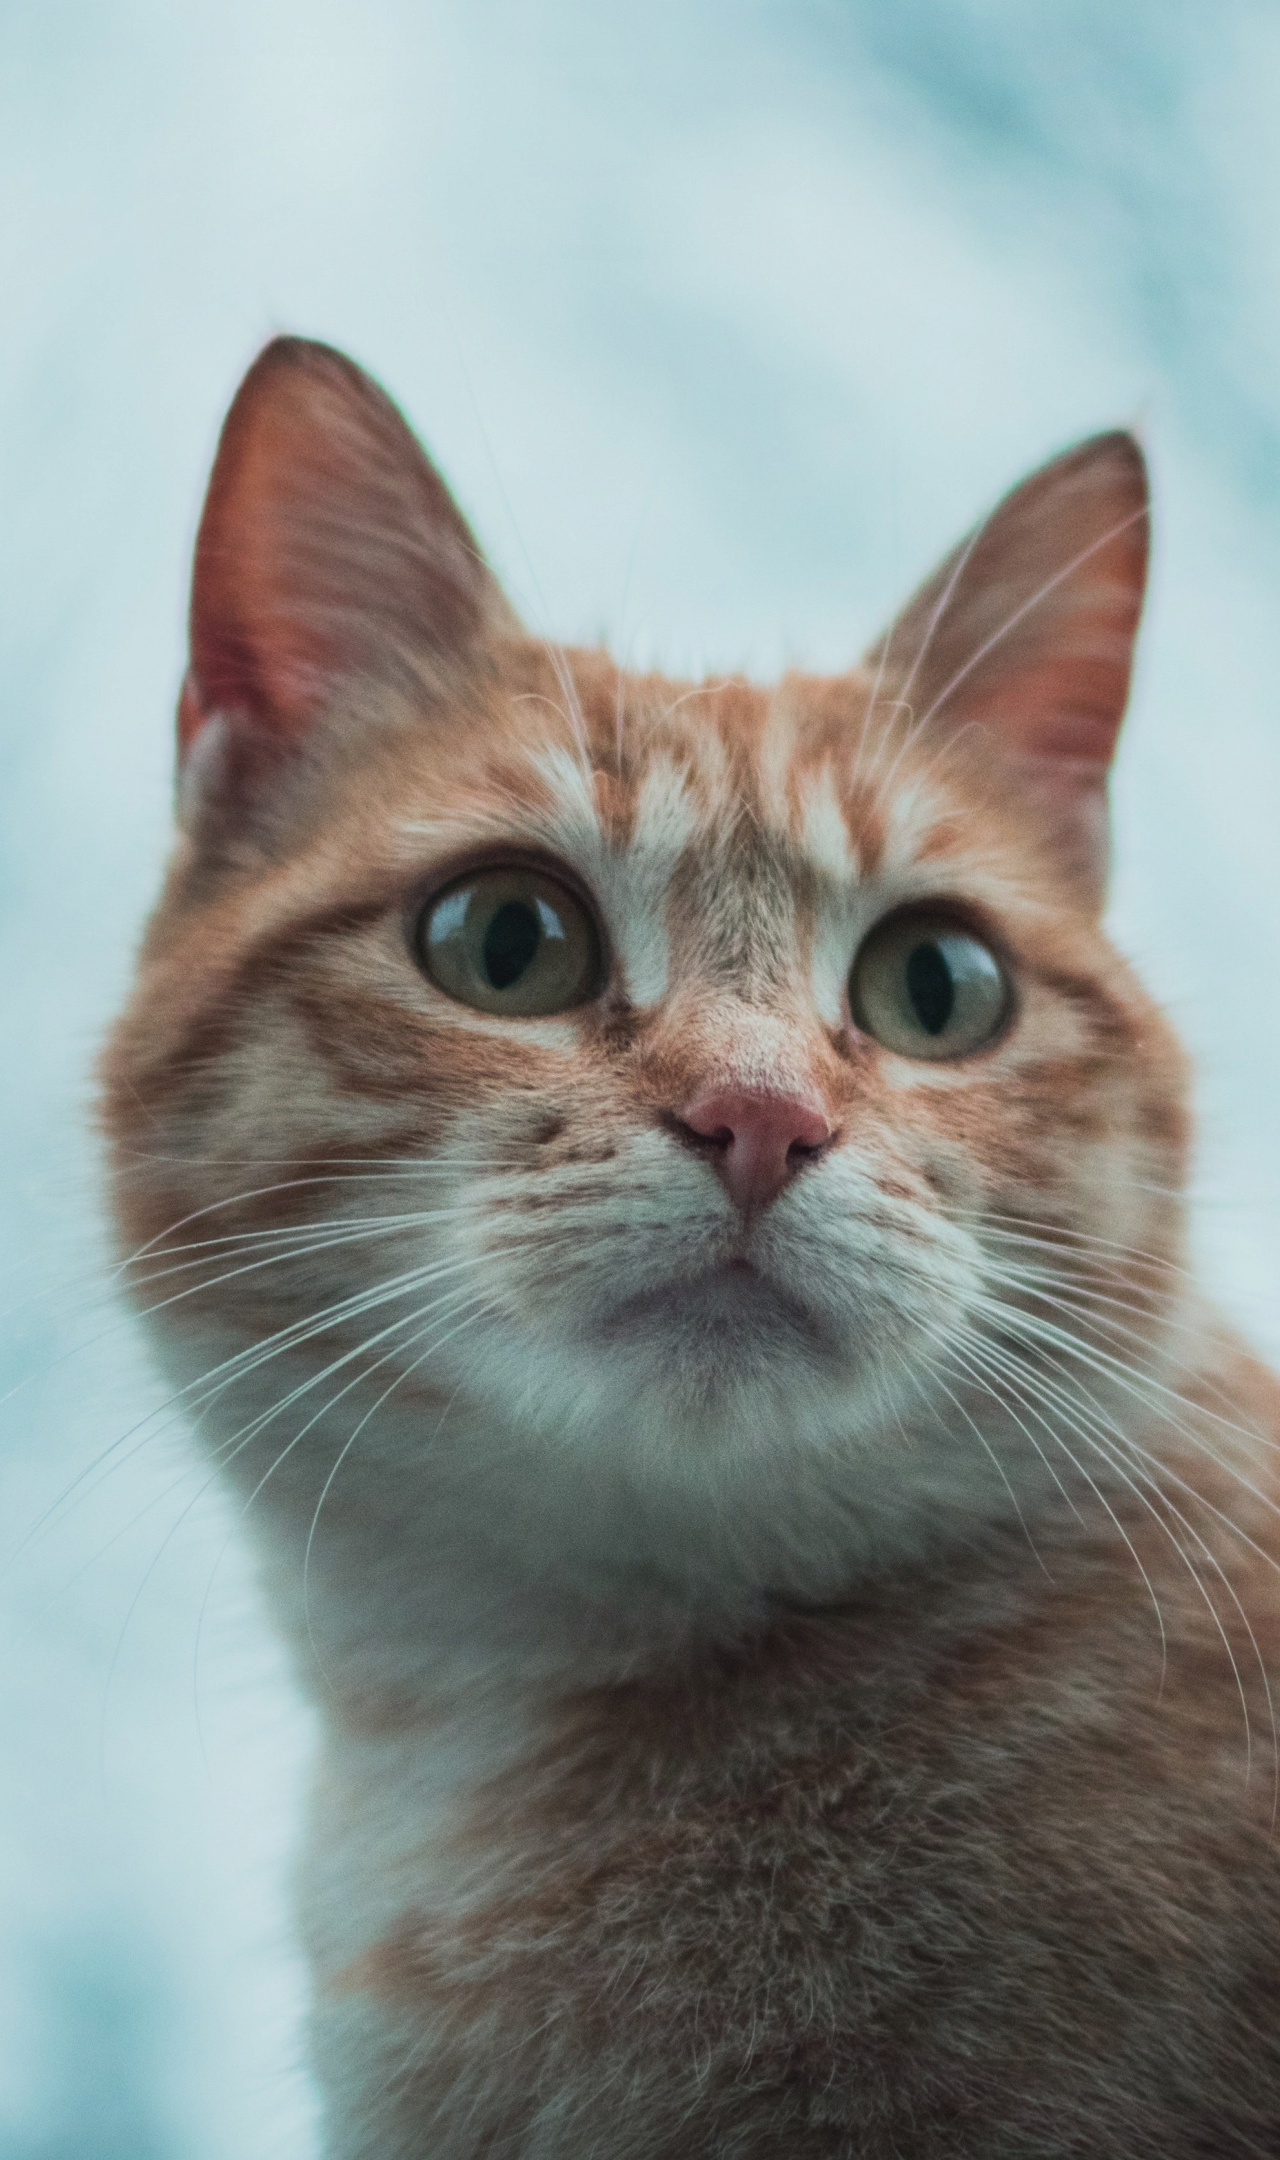

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list =[]

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [7]:
for channel in range(gatito_np.shape[2]):
    secret_aux = np.zeros((gatito_np.shape[0],gatito_np.shape[1]), dtype='uint8')
    secret_aux = gatito_np[:,:,channel]%2
    secret_aux = (secret_aux*255).astype(np.uint8)
    secret_list.append(secret_aux)

In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]), axis=1) 
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np, mode="L")

Ahora puedes ver el resultado!

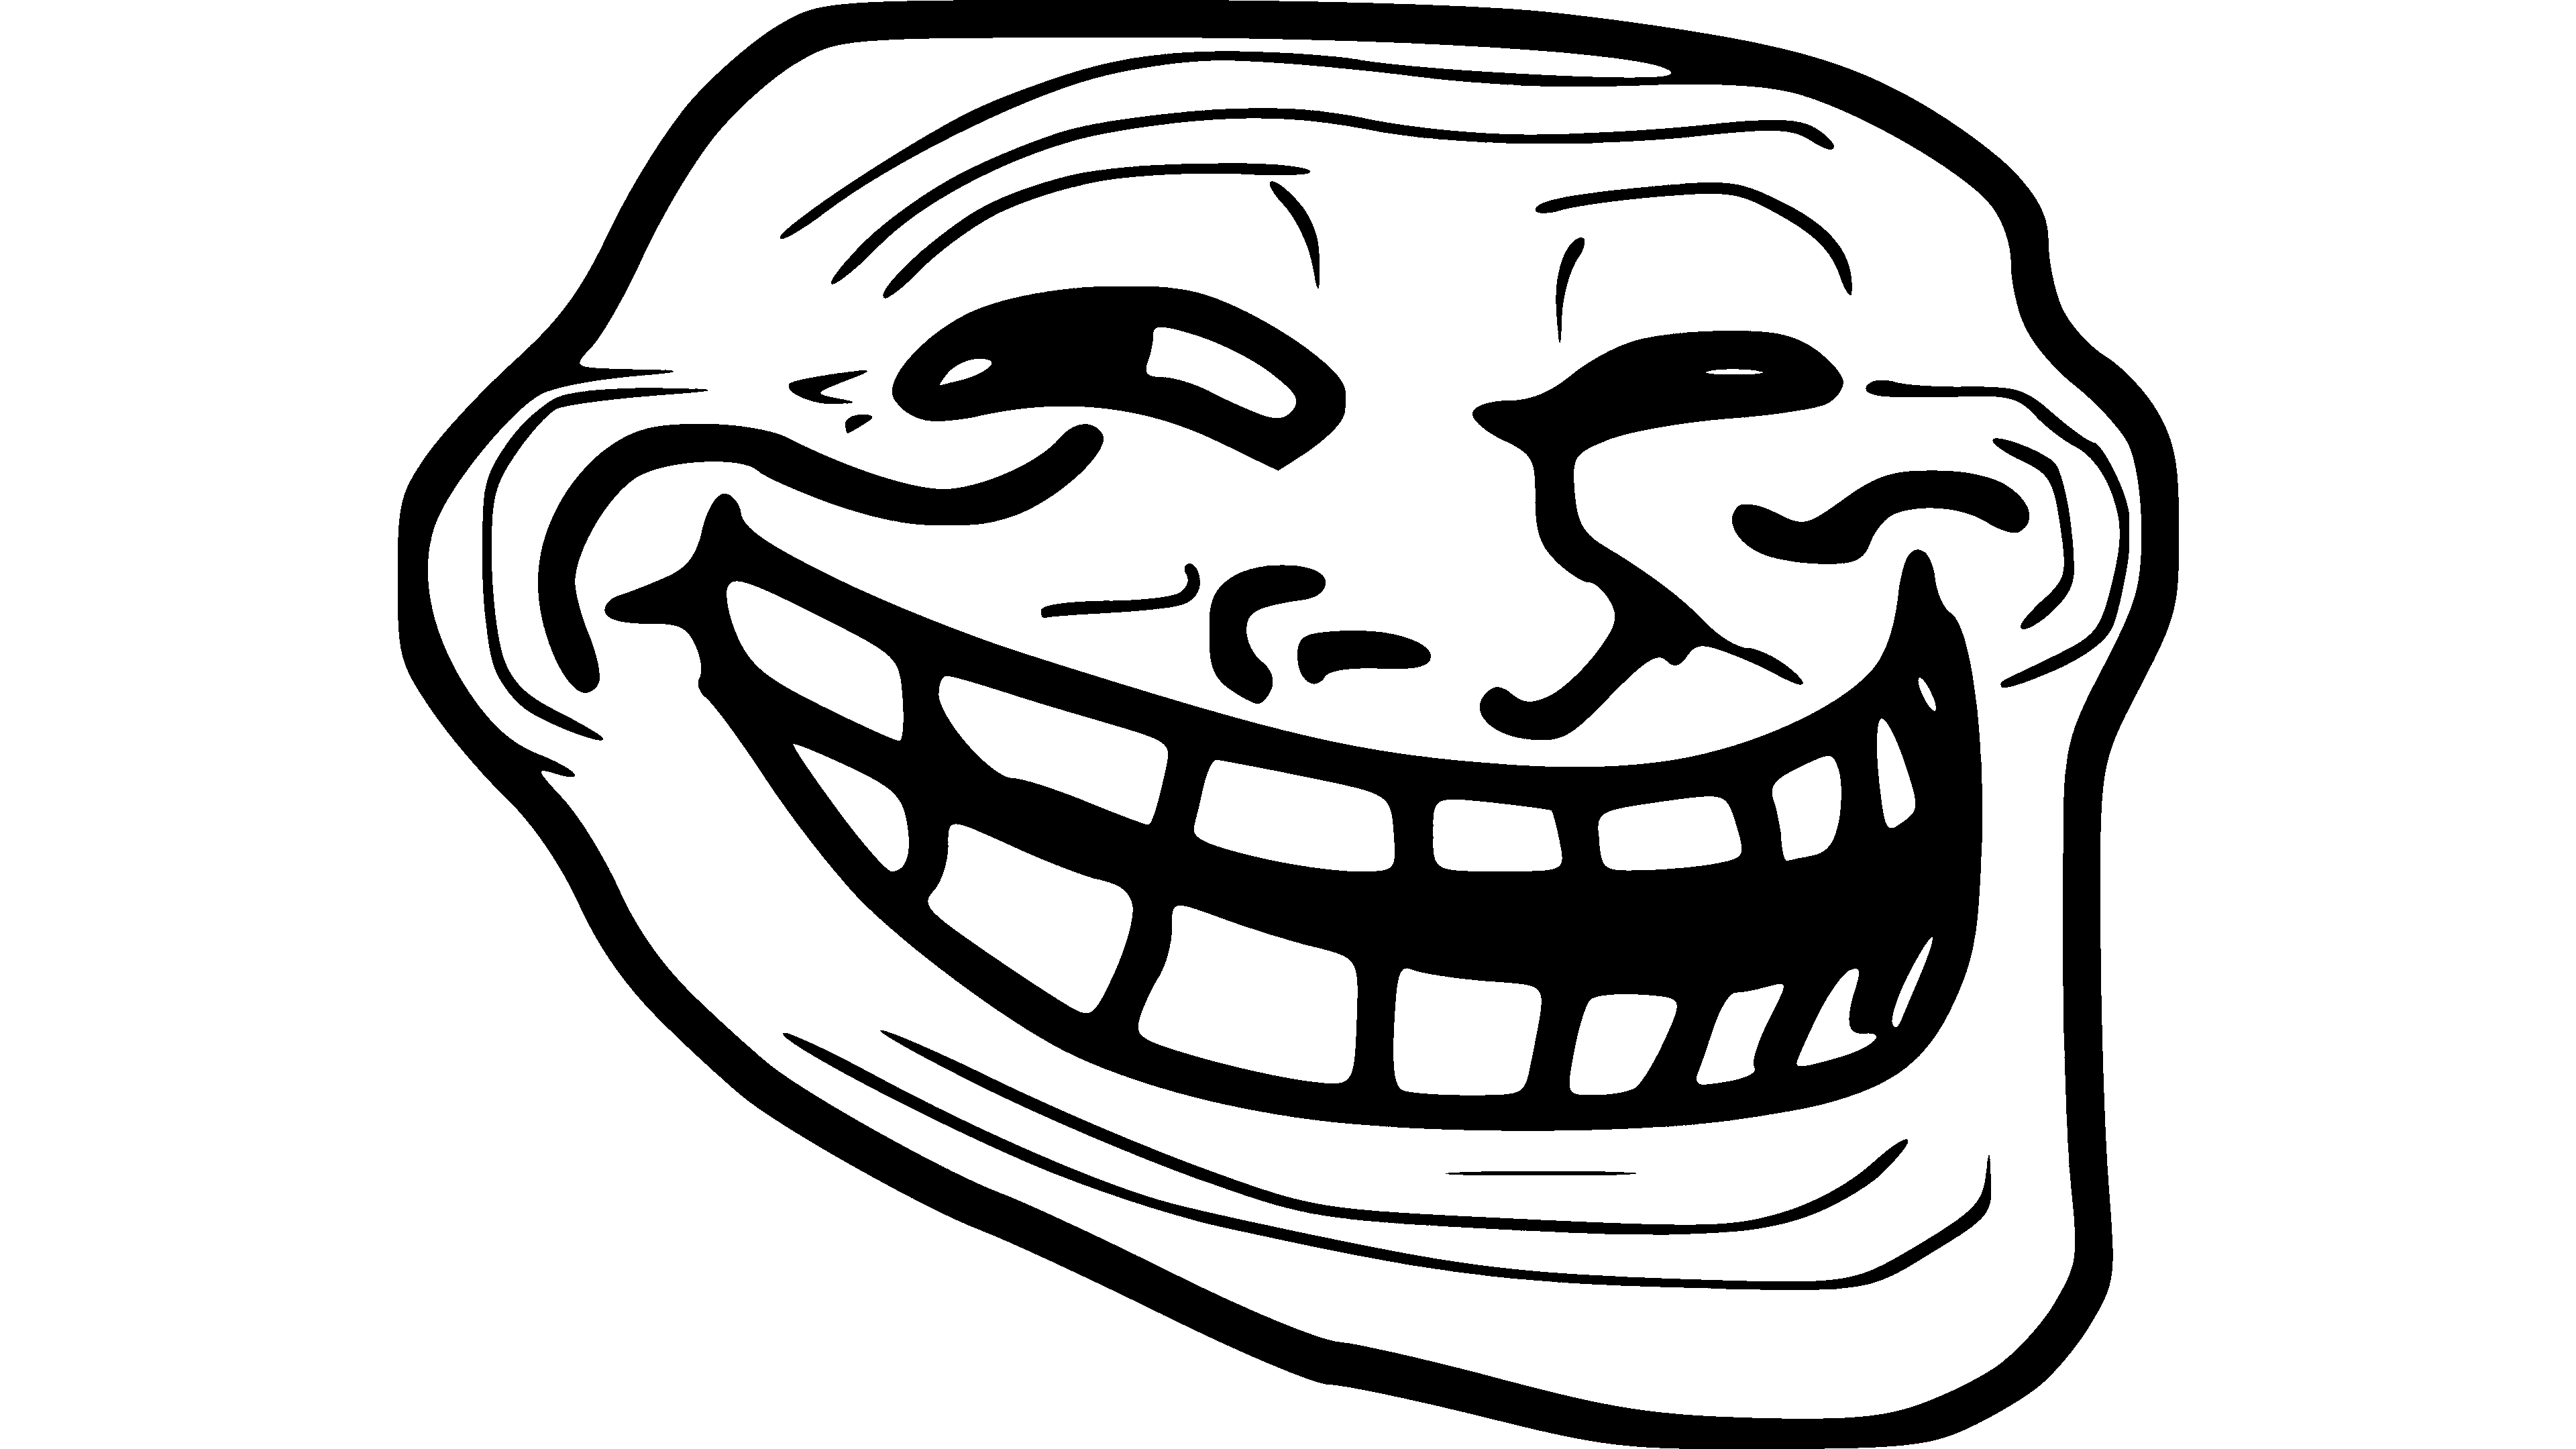

In [13]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
my_img = Image.open(os.path.join("images", "black_and_white_example.jpg"))

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [15]:
my_img_np = np.array(my_img)
print(my_img_np.shape)

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [16]:
umbral = 20
my_img_np = my_img_np -20*np.zeros((my_img_np.shape[0],my_img_np.shape[1]))
my_img_np_aux = np.heaviside(my_img_np, 0).astype(np.uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

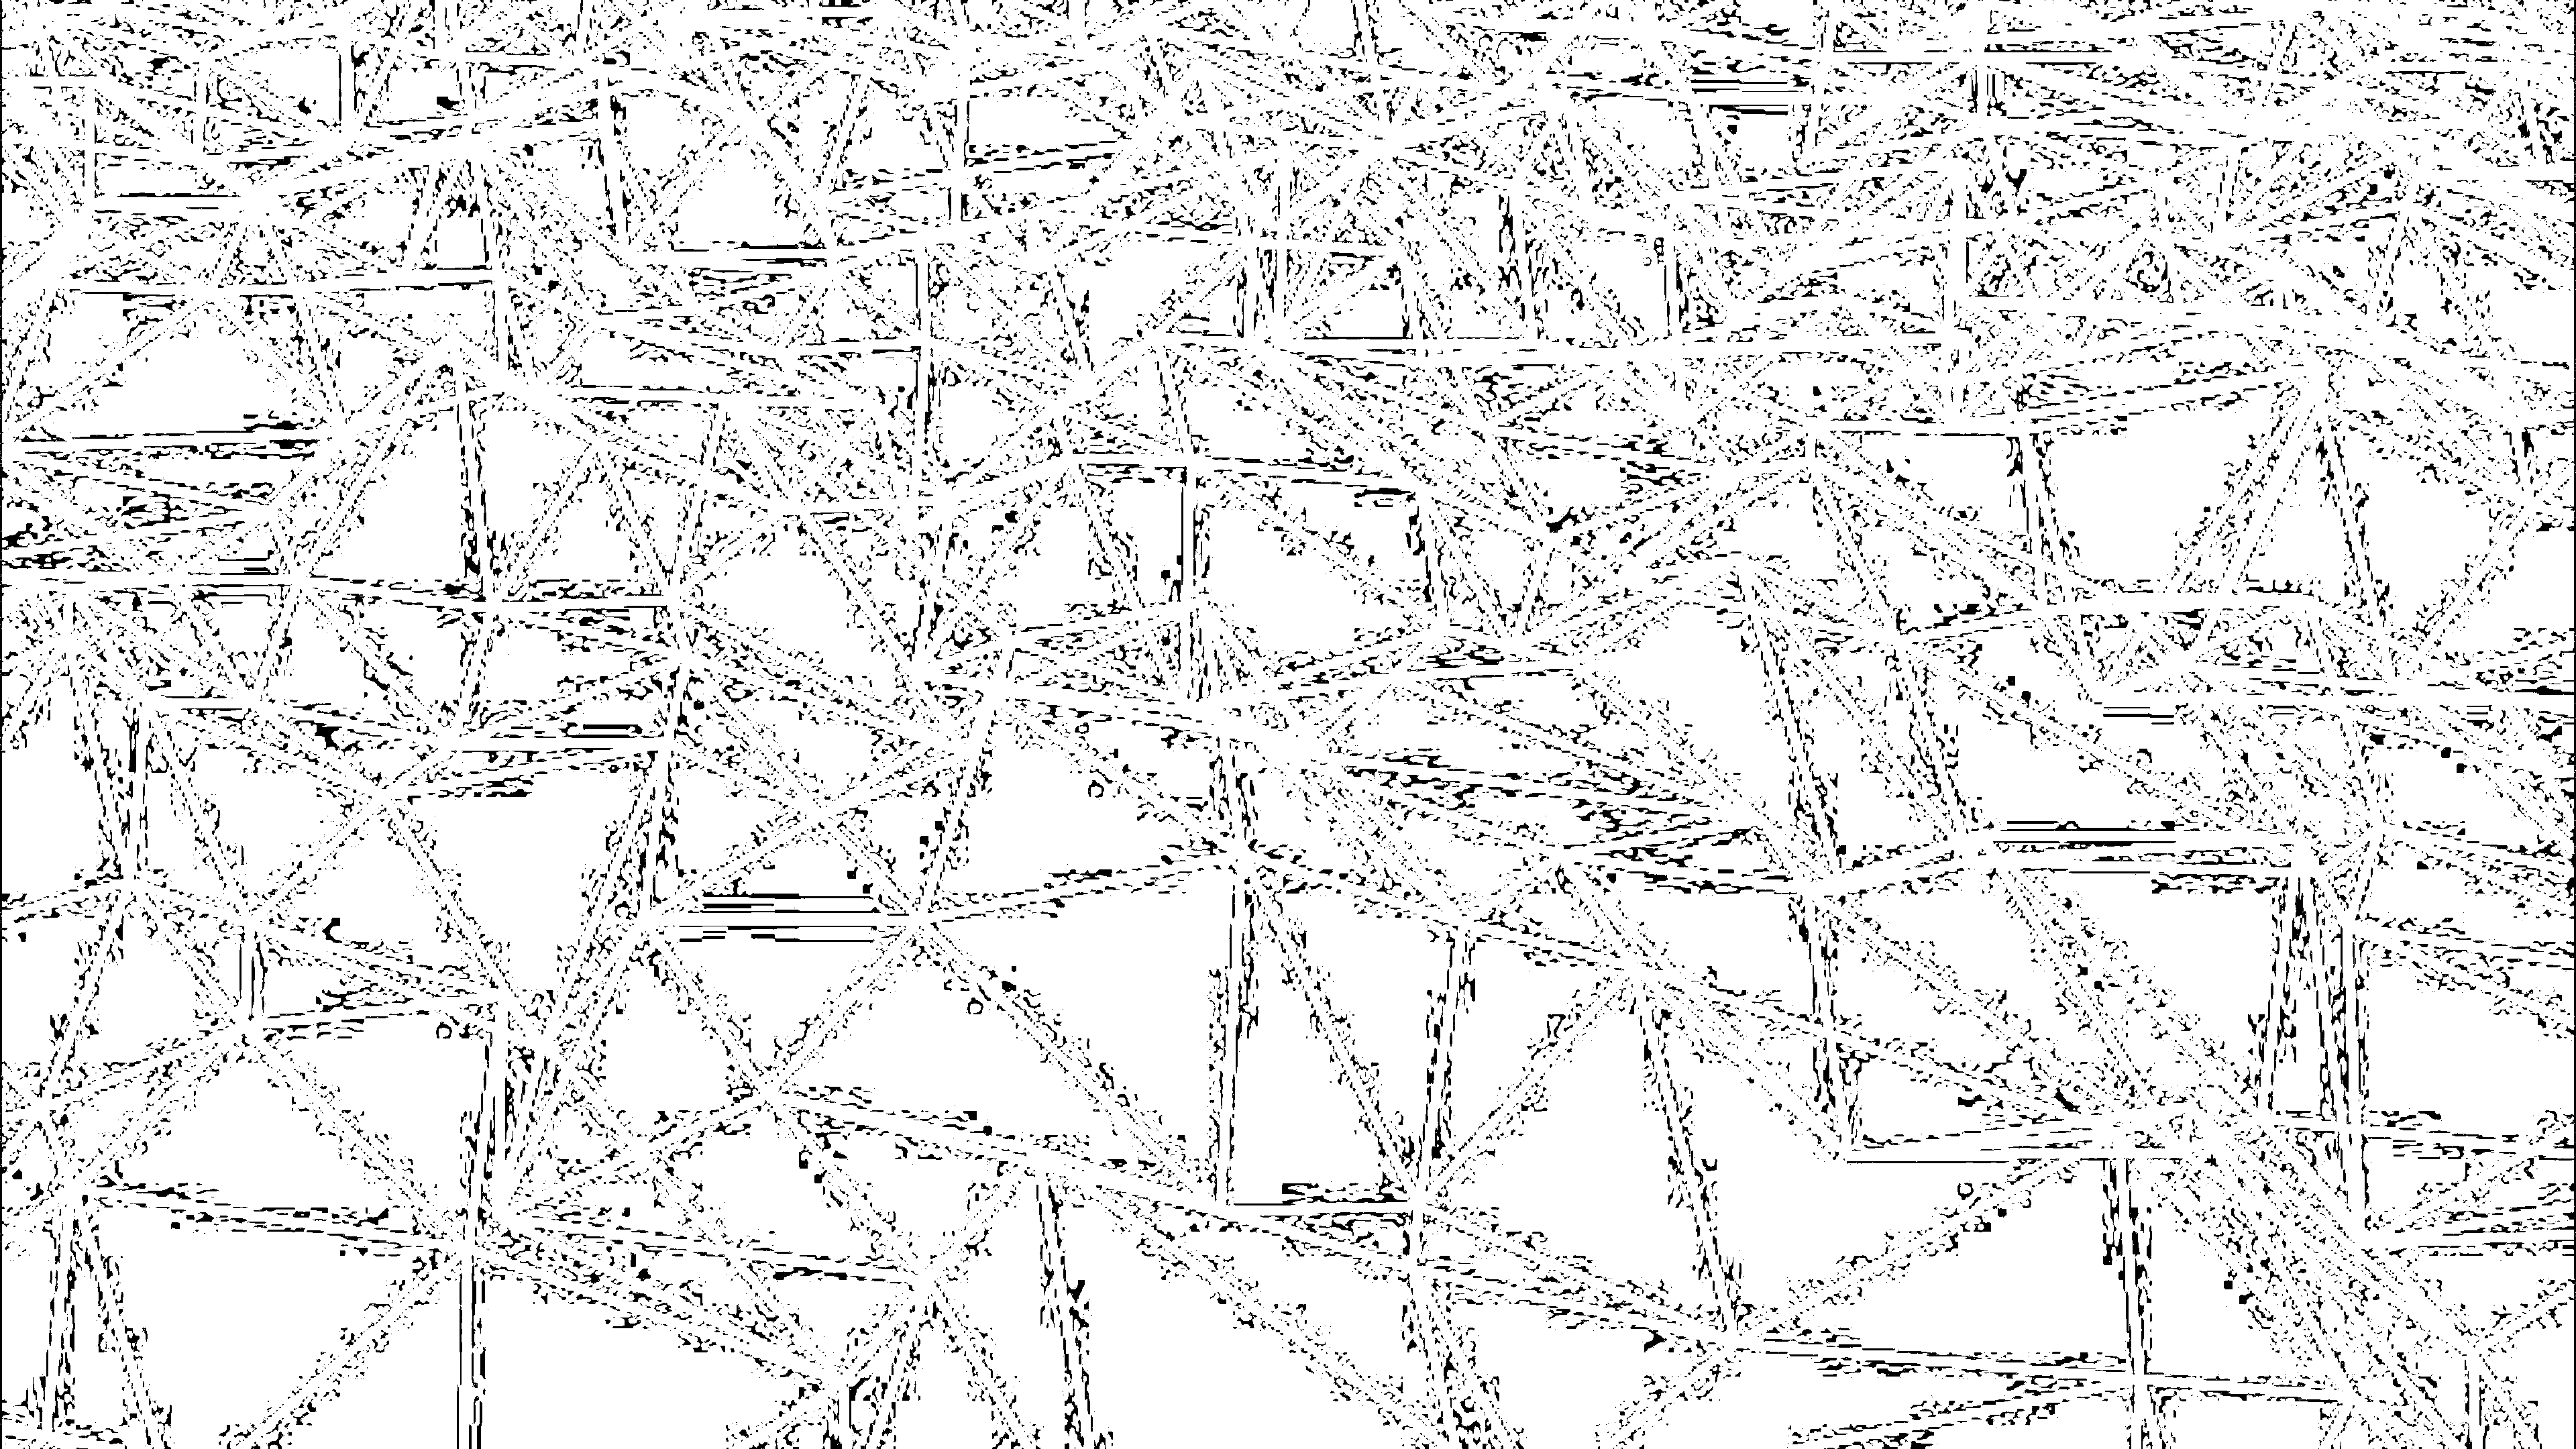

In [17]:
Image.fromarray(my_img_np_aux * 255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [18]:
my_img_split = np.split(my_img_np_aux, 3, axis=1)

Revisa utilizando la siguiente iteración.

In [19]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [20]:
cat = Image.open(os.path.join("images", "gatito_original.png"))
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [21]:
cat_np =np.vectorize(lambda x: x+1 if x%2!=0 else x)(cat_np)

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [22]:
for channel in range(cat_np.shape[2]):
    cat_np[:,:,channel] += my_img_split[channel]

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [23]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save(os.path.join("images","my_secret.png"))

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [24]:
def imagenception(filepath):
    secret_list =[]
    for channel in range(gatito_np.shape[2]):
        secret_aux = np.zeros((gatito_np.shape[0],gatito_np.shape[1]), dtype='uint8')
        secret_aux = gatito_np[:,:,channel]%2
        secret_aux = (secret_aux*255).astype(np.uint8)
        secret_list.append(secret_aux)
    secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]), axis=1)
    secret_img = Image.fromarray(secret_np, mode="L")
    return secret_img

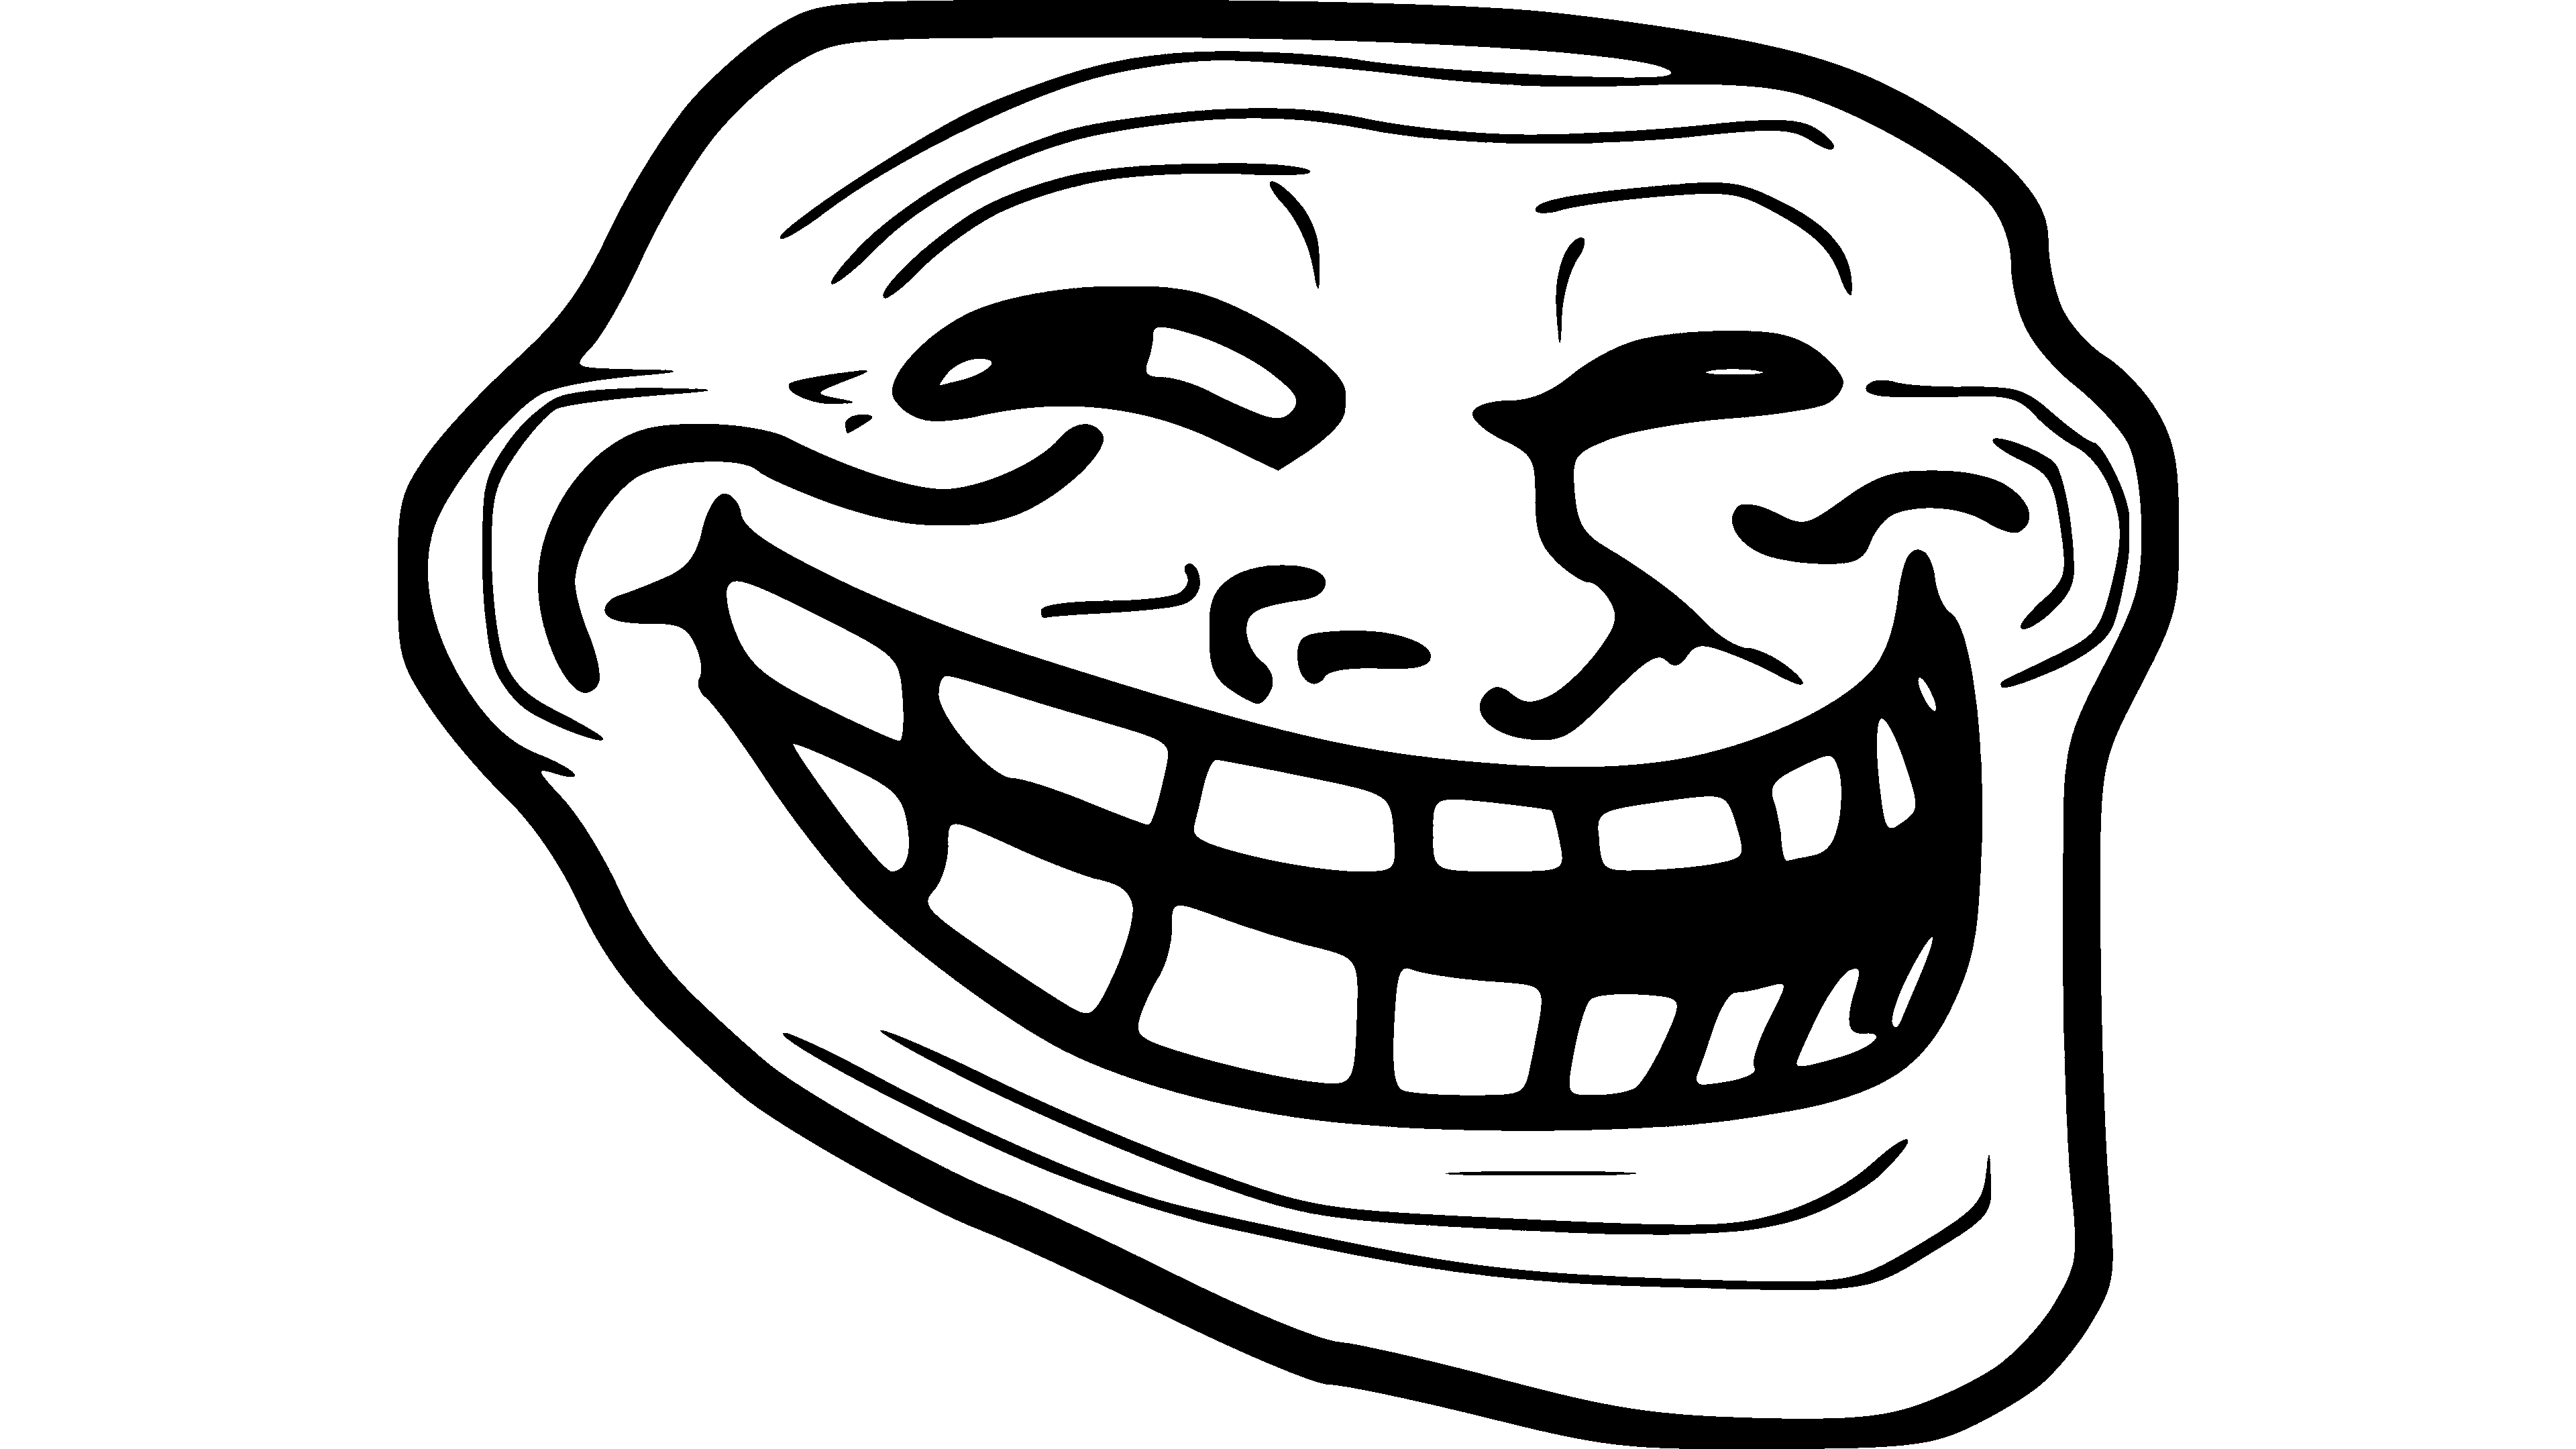

In [25]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [26]:
# libraries
import os
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [27]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [28]:
df_dict[2016].head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [29]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  Se arma una lista de los diferentes columnas que tiene cada dataset, de lo cual se intersectan esos 3 arrays con el fin de que queden solo las columnas que comparten los 3, agregando a su vez la columna year y así resolviendo el problema.

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [30]:
happiness = (
    pd.concat(df_dict, keys=[2015,2016,2017],names=['Year','drop_me'])
    .droplevel('drop_me')
    .reset_index()
    .filter(intersection_columns)
    .rename(columns= lambda x: x.lower().replace(' ','_').replace('(','').replace(')',''))
)
happiness.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4       Canada            2.45176                 1.32629  1.32261  0.63297   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.45811               5            7.427                 0.90563   

   trust_government_corruption  year  
0                      0.41978  2015  
1                      0.14145  2015  
2                      0.48357  2015  
3                      0.36503  2015  
4                      0.32957  2015

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [31]:
happiness.describe(include="all").fillna("").T

count unique         top freq      mean       std  \
country                       470    166  Luxembourg    3                       
dystopia_residual             470                           2.09272  0.565772   
economy_gdp_per_capita        470                           0.92783  0.415584   
family                        470                          0.990347  0.318707   
freedom                       470                          0.402828  0.150356   
generosity                    470                          0.242241  0.131543   
happiness_rank                470                           78.8298   45.2814   
happiness_score               470                           5.37073     1.137   
health_life_expectancy        470                          0.579968  0.240161   
trust_government_corruption   470                           0.13479  0.111313   
year                          470                           2015.99  0.816907   

                                 min        25%        50%       75%       max  
country                                                                         
dystopia_residual            0.32858    1.73798    2.09464   2.45557   3.83772  
economy_gdp_per_capita             0   0.605292   0.995439   1.25244   1.87077  
family                             0      0.793    1.02567   1.22875   1.61057  
freedom                            0   0.297615   0.418347   0.51685   0.66973  
generosity                         0   0.152831    0.22314  0.315824  0.838075  
happiness_rank                     1         40         79       118       158  
happiness_score                2.693      4.509     5.2825   6.23375     7.587  
health_life_expectancy             0   0.402301   0.630053  0.768298   1.02525  
trust_government_corruption        0  0.0597774  0.0995017  0.173161   0.55191  
year                            2015       2015       2016      2017      2017

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [32]:
## FIX ME ##
grupo=happiness.groupby('year').count()["country"]
print("En el año ",grupo.index[0]," hay", len(happiness.country.unique()) - grupo.values[0], "paises sin mediciones")
print("En el año ",grupo.index[1]," hay", len(happiness.country.unique()) - grupo.values[1], "paises sin mediciones")
print("En el año ",grupo.index[2]," hay", len(happiness.country.unique()) - grupo.values[2], "paises sin mediciones")
sin_medicion_2015=len(happiness.country.unique()) - grupo.values[0]
sin_medicion_2016=len(happiness.country.unique()) - grupo.values[1]
sin_medicion_2017=len(happiness.country.unique()) - grupo.values[2]

En el año  2015  hay 8 paises sin mediciones
En el año  2016  hay 9 paises sin mediciones
En el año  2017  hay 11 paises sin mediciones


In [33]:
paises=set(happiness["country"].unique())
paises_2015=set(happiness[happiness["year"]==2015]["country"])
print("Los paises del 2015 son", paises-paises_2015)
paises_2016=set(happiness[happiness["year"]==2016]["country"])
print("Los paises del 2016 son", paises-paises_2016)
paises_2017=set(happiness[happiness["year"]==2017]["country"])
print("Los paises del 2017 son", paises-paises_2017)

Los paises del 2015 son {'Somaliland Region', 'Somalia', 'Taiwan Province of China', 'South Sudan', 'Belize', 'Namibia', 'Puerto Rico', 'Hong Kong S.A.R., China'}
Los paises del 2016 son {'Somaliland region', 'Taiwan Province of China', 'Oman', 'Lesotho', 'Mozambique', 'Swaziland', 'Central African Republic', 'Djibouti', 'Hong Kong S.A.R., China'}
Los paises del 2017 son {'Somaliland Region', 'Laos', 'Somaliland region', 'Suriname', 'Oman', 'Hong Kong', 'Swaziland', 'Puerto Rico', 'Comoros', 'Taiwan', 'Djibouti'}


__Respuesta:__  En el año 2015 hay 8 paises sin mediciones: 'South Sudan', 'Somalia', 'Namibia', 'Belize', 'Hong Kong S.A.R., China', 'Taiwan Province of China', 'Puerto Rico', 'Somaliland Region.
En el año 2016 hay 9 paises sin mediciones: 'Lesotho', 'Oman', 'Central African Republic', 'Djibouti', 'Mozambique', 'Hong Kong S.A.R., China', 'Taiwan Province of China', 'Somaliland region', 'Swaziland'.
En el año  2017  hay 11 paises sin mediciones: 'Oman', 'Hong Kong', 'Djibouti', 'Laos', 'Puerto Rico', 'Somaliland region', 'Suriname', 'Somaliland Region', 'Comoros', 'Taiwan', 'Swaziland'.

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [34]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", "Taiwan Province of China":"Taiwan","Somaliland Region":"Somaliland region"}
lista=[]
for pais in happiness.country.values:
    if pais in bad_country_names_dict.keys():
        lista.append(bad_country_names_dict[pais])
    else:
        lista.append(pais)
happiness = happiness.assign(country=lista)

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [35]:
grupo=happiness.groupby('year').count()["country"]
print("En el año ",grupo.index[0]," hay", len(happiness.country.unique()) - grupo.values[0], "paises sin mediciones")
print("En el año ",grupo.index[1]," hay", len(happiness.country.unique()) - grupo.values[1], "paises sin mediciones")
print("En el año ",grupo.index[2]," hay", len(happiness.country.unique()) - grupo.values[2], "paises sin mediciones")

En el año  2015  hay 5 paises sin mediciones
En el año  2016  hay 6 paises sin mediciones
En el año  2017  hay 8 paises sin mediciones


__Respuesta:__  En el año  2015  hay 5 paises sin mediciones.
En el año  2016  hay 6 paises sin mediciones.
En el año  2017  hay 8 paises sin mediciones.

Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [36]:

happiness_piv = happiness.pivot_table(index = "year", columns = "country",values = "happiness_score")
happiness_piv = happiness_piv.fillna("")
happiness_piv

country  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
year                                                                            
2015           3.575    4.959    5.605   4.033      6.574    4.350      7.284   
2016           3.360    4.655    6.355   3.866      6.650    4.360      7.313   
2017           3.794    4.644    5.872   3.795      6.599    4.376      7.284   

country  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium Belize  \
year                                                                         
2015       7.200       5.212    5.960       4.694    5.813    6.937          
2016       7.119       5.291    6.218       4.643    5.802    6.929  5.956   
2017       7.006       5.234    6.087       4.608    5.569    6.891  5.956   

country  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  \
year                                                                        
2015     3.340   5.253    5.890                   4.949     4.332   6.983   
2016     3.484   5.196    5.822                   5.163     3.974   6.952   
2017     3.657   5.011    5.823                   5.182     3.766   6.635   

country  Bulgaria  Burkina Faso  Burundi  Cambodia  Cameroon  Canada  \
year                                                                   
2015        4.218         3.587    2.905     3.819     4.252   7.427   
2016        4.217         3.739    2.905     3.907     4.513   7.404   
2017        4.714         4.032    2.905     4.168     4.695   7.316   

country Central African Republic   Chad  Chile  China  Colombia Comoros  \
year                                                                      
2015                       3.678  3.667  6.670  5.140     6.477   3.956   
2016                              3.763  6.705  5.245     6.481   3.956   
2017                       2.693  3.936  6.652  5.273     6.357           

country  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Croatia  Cyprus  \
year                                                                          
2015                   3.989             4.517       7.226    5.759   5.689   
2016                   4.236             4.272       7.087    5.488   5.546   
2017                   4.291             4.280       7.079    5.293   5.621   

country  Czech Republic  Denmark Djibouti  Dominican Republic  Ecuador  Egypt  \
year                                                                            
2015              6.505    7.527    4.369               4.885    5.975  4.194   
2016              6.596    7.526                        5.155    5.976  4.362   
2017              6.609    7.522                        5.230    6.008  4.735   

country  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  \
year                                                                       
2015           6.130    5.429     4.512    7.406   6.575  3.896    4.297   
2016           6.068    5.517     4.508    7.413   6.478  4.121    4.252   
2017           6.003    5.611     4.460    7.469   6.442  4.465    4.286   

country  Germany  Ghana  Greece  Guatemala  Guinea  Haiti  Honduras  \
year                                                                  
2015       6.750  4.633   4.857      6.123   3.656  4.518     4.788   
2016       6.994  4.276   5.033      6.324   3.607  4.028     4.871   
2017       6.951  4.120   5.227      6.454   3.507  3.603     5.181   

country  Hong Kong  Hungary  Iceland  India  Indonesia   Iran   Iraq  Ireland  \
year                                                                            
2015         5.474    4.800    7.561  4.565      5.399  4.686  4.677    6.940   
2016         5.458    5.145    7.501  4.404      5.314  4.813  4.575    6.907   
2017         5.472    5.324    7.504  4.315      5.262  4.692  4.497    6.977   

country  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  \
year                                                        

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  Se podria saber rapidamente el pais con mayor happiness score cada año junto con el apinnes score de cada año por pais. No siempre es bueno hacer esto puesto que depende de lo que se quiera, por ejemplo si quisieramos saber el maximo hapinnes score en los 3 años juntos nos seria mas facil analizarlo en el frame inicial

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [37]:
ranking_felicidad =  happiness.pivot_table(index = "year", columns = "country",values = "happiness_rank")
ranking_felicidad = ranking_felicidad.fillna("")
ranking_felicidad.mean().sort_values()

country
Denmark          2.000000
Switzerland      2.333333
Iceland          2.666667
Norway           3.000000
Finland          5.333333
                  ...    
Benin          150.333333
Rwanda         152.333333
Togo           154.333333
Syria          154.666667
Burundi        156.000000
Length: 148, dtype: float64

__Respuesta:__  Los paises con maor ranking de felicidad en promedio son Denmark, Switzerland y Iceland

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [38]:
happiness_piv = happiness_piv.fillna("")
happiness_piv.mean().sort_values()

country
Burundi        2.905000
Syria          3.179000
Togo           3.212333
Rwanda         3.483667
Benin          3.493667
                 ...   
Finland        7.429333
Norway         7.519000
Iceland        7.522000
Denmark        7.525000
Switzerland    7.530000
Length: 148, dtype: float64

__Respuesta:__  Los paises con maor ranking de felicidad en promedio son  Switzerland, Denmark y Iceland.
Los cuales son los mismos que estas en los 3 con mejor ranking promedio. 

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [39]:
hap_mean_factors = happiness.drop(columns=["happiness_score","happiness_rank"]).groupby("year").mean()
hap_mean_factors

dystopia_residual  economy_gdp_per_capita    family   freedom  \
year                                                                  
2015           2.098977                0.846137  0.991046  0.428615   
2016           2.325807                0.953880  0.793621  0.370994   
2017           1.850238                0.984718  1.188898  0.408786   

      generosity  health_life_expectancy  trust_government_corruption  
year                                                                   
2015    0.237296                0.630259                     0.143422  
2016    0.242635                0.557619                     0.137624  
2017    0.246883                0.551341                     0.123120

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

__Respuesta:__
* 2015:  dystopia_residual con 2.098977
* 2016:  dystopia_residual con 2.325807	
* 2017:  dystopia_residual con 1.850238	

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [40]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [41]:
suicide.describe(include="all").fillna("").T

count unique             top   freq         mean  \
country             27820    101       Mauritius    382                
year                27820                                    2001.26   
sex                 27820      2          female  13910                
age                 27820      6       75+ years   4642                
suicides_no         27820                                    242.574   
population          27820                                1.84479e+06   
suicides/100k pop   27820                                    12.8161   
country-year        27820   2321     Hungary2002     12                
HDI for year         8364                                   0.776601   
 gdp_for_year ($)   27820   2321  69,386,774,475     12                
gdp_per_capita ($)  27820                                    16866.5   
generation          27820      6    Generation X   6408                

                            std    min      25%     50%          75%  \
country                                                                
year                    8.46906   1985     1995    2002         2008   
sex                                                                    
age                                                                    
suicides_no             902.048      0        3      25          131   
population          3.91178e+06    278  97498.5  430150  1.48614e+06   
suicides/100k pop       18.9615      0     0.92    5.99        16.62   
country-year                                                           
HDI for year          0.0933667  0.483    0.713   0.779        0.855   
 gdp_for_year ($)                                                      
gdp_per_capita ($)      18887.6    251     3447    9372        24874   
generation                                                             

                            max  
country                          
year                       2016  
sex                              
age                              
suicides_no               22338  
population          4.38052e+07  
suicides/100k pop        224.97  
country-year                     
HDI for year              0.944  
 gdp_for_year ($)                
gdp_per_capita ($)       126352  
generation

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [42]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(["country","year"])
    .agg(
      {
        "population":"sum",
        "suicides_no":"sum"
      }
    )
    .reset_index()
    .assign(
        suicides_ratio_100k=lambda x:100*x.suicides_no/x.population,
        suicides_rank= lambda x: x.groupby("year")["suicides_ratio_100k"].rank(ascending = False,method = "max")
    )
)


Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [43]:
hap_sui = pd.merge(happiness,suicides_agg,on = ["year","country"])
hap_sui.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4      Finland            2.61955                 1.29025  1.31826  0.64169   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.23351               6            7.406                 0.88911   

   trust_government_corruption  year  population  suicides_no  \
0                      0.41978  2015     7892502         1073   
1                      0.14145  2015      308554           40   
2                      0.48357  2015     5383060          564   
3                      0.36503  2015     4882909          590   
4                      0.41372  2015     5181797          731   

   suicides_ratio_100k  suicides_rank  
0             0.013595           22.0  
1             0.012964           24.0  
2             0.010477           31.0  
3             0.012083           26.0  
4             0.014107           18.0

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [44]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()

happiness_rank  suicides_rank
happiness_rank        1.000000       0.038896
suicides_rank         0.038896       1.000000

__Respuesta:__  El coeficiente de correlacón es 0.038896 por lo que no existe correlación lineal.

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [45]:
hap_sui.groupby("year")[["happiness_rank", "suicides_rank"]].corr()

happiness_rank  suicides_rank
year                                              
2015 happiness_rank        1.000000       0.101215
     suicides_rank         0.101215       1.000000
2016 happiness_rank        1.000000       0.022048
     suicides_rank         0.022048       1.000000

__Respuesta:__  En el año 2015 tienen un coeficiente de correlación de 0.101215.
En el año 2016 tienen un coeficiente de correlación de 0.022048.
Por lo cual no hay correlación lineal.


¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [46]:
hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr()

happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.021455
suicides_ratio_100k         0.021455             1.000000

In [47]:
hap_sui.groupby("year")[["happiness_score", "suicides_ratio_100k"]].corr()

happiness_score  suicides_ratio_100k
year                                                          
2015 happiness_score             1.000000             0.035262
     suicides_ratio_100k         0.035262             1.000000
2016 happiness_score             1.000000             0.025924
     suicides_ratio_100k         0.025924             1.000000

De la misma manera vemos que no hay correlación lineal entre ambas variables.

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [51]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 3.1 

Explique lo que se hizo en la celda anterior detalladamente.

Para cada año del 2015 al 2020 se trajo su respectivo dataframe de costos de vida, pasando todos los nombres de colmnas a letra minuscula y los espacios cambiandolos por "_", luego se agrega la columna rank que es la suma del indice + 1, luego se escribe el indice como rank y se concatenan los dataframes de cada año. Luego se le da el nombre de year y rank a nuestra nueva axis y al indice.

### Ejercicio 3.2 

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

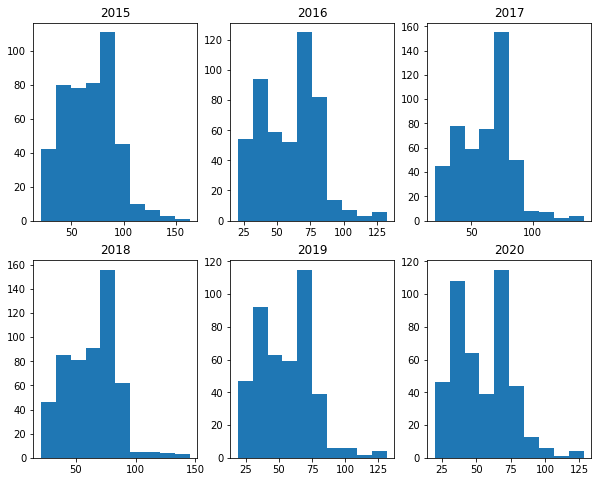

In [52]:
i=1
plt.figure(figsize = (10,8))
for year in years:
    plt.subplot(2,3,i)
    plt.title(str(year))
    plt.hist(life_cost[life_cost["year"]==year]["cost_of_living_index"])
    i=i+1

Podemos notar que en todos los años muy pocas ciudades llega a tener indices de costo de vida mayor a 100, por lo cual podemos notar que hay pocas ciudades que tienen un costo de vida mayor que New York durante los años. Por lo cual New York es una ciudad con un costo de vida alto comparado con las demas.

### Ejercicio 3.3 

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [53]:
rol_seed = 201110002  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
my_cities

array(['Nicosia, Cyprus', 'Bali, Indonesia',
       'Los Angeles, CA, United States', 'Vadodara, India',
       'Virginia Beach, VA, United States',
       'Huntsville, AL, United States', 'Tokyo, Japan', 'Aachen, Germany',
       'Podgorica, Montenegro', 'Bloomington, IN, United States'],
      dtype=object)

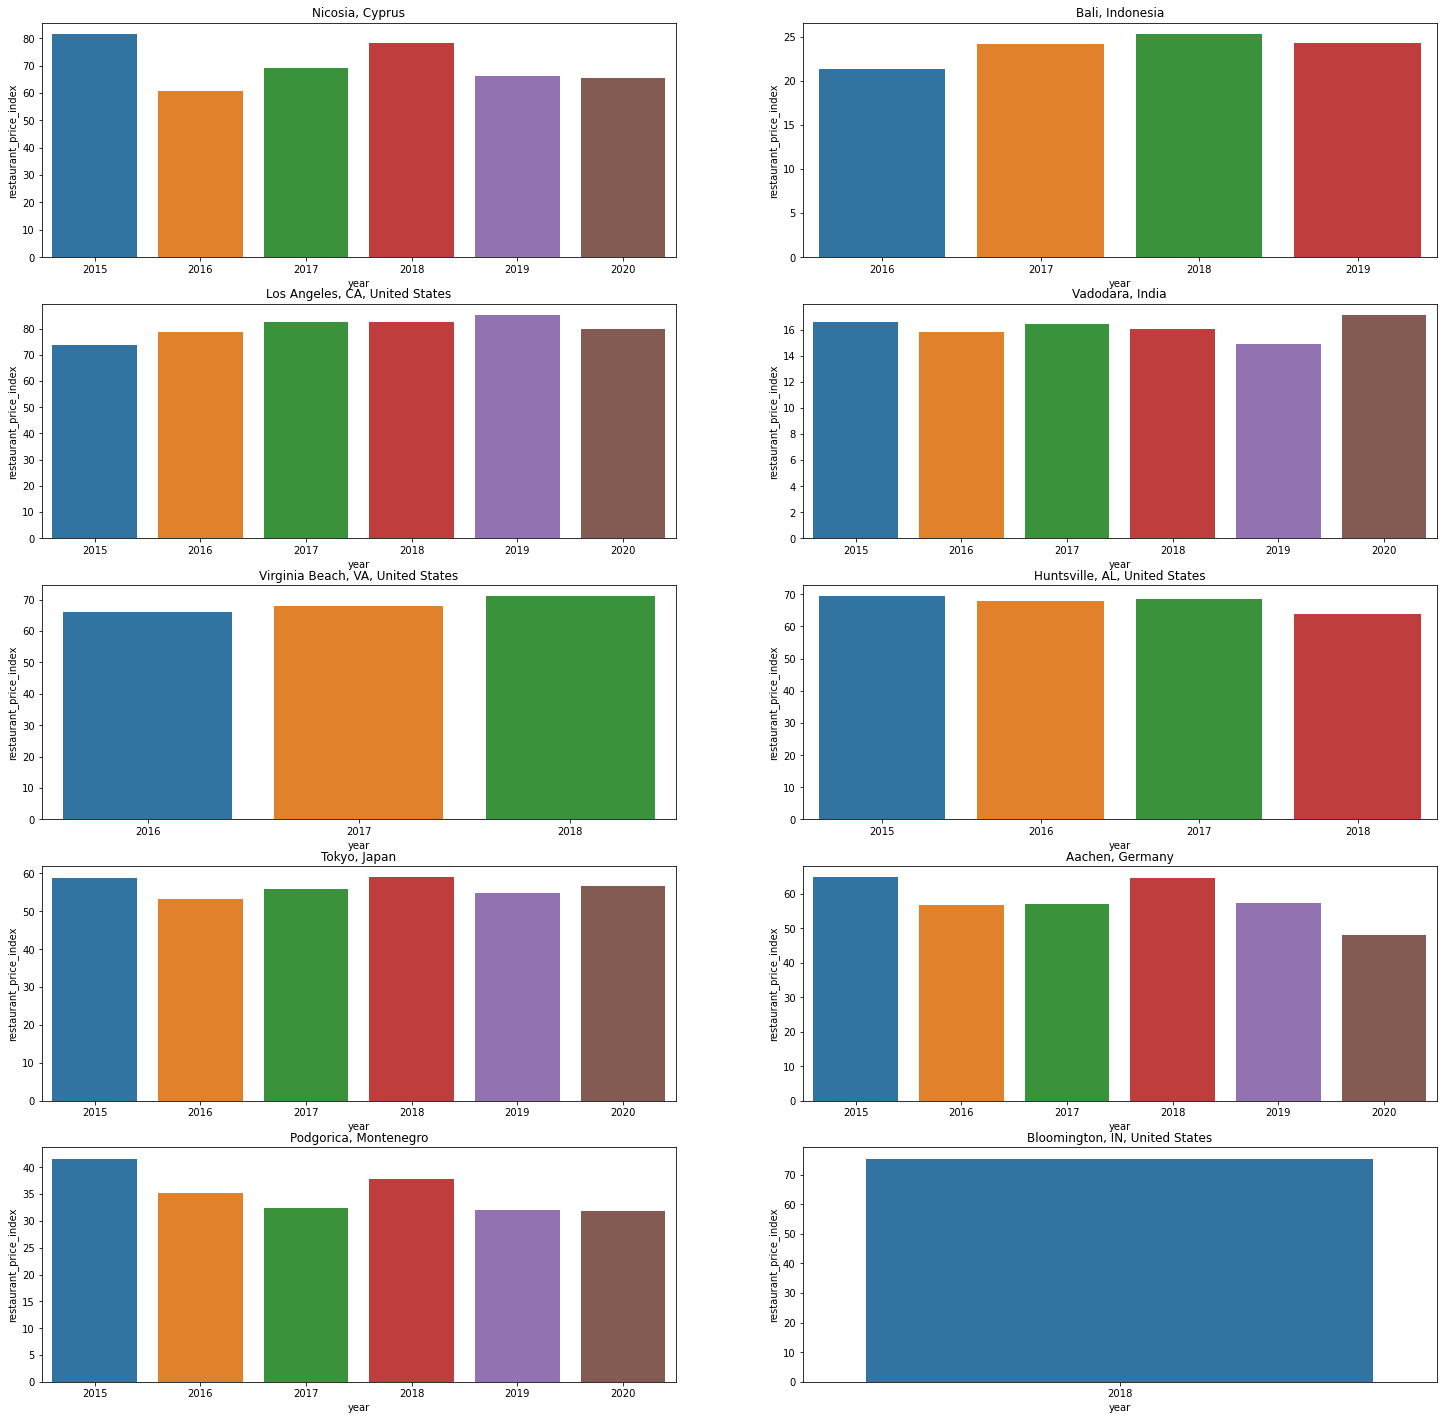

In [54]:
import seaborn as sns
i=1
plt.figure(figsize = (25,25))
for ciudad in my_cities:
    plt.subplot(5,2,i)
    plt.title(str(ciudad))
    sns.barplot(
        x='year',
        y='restaurant_price_index',
        data=life_cost[life_cost["city"] == ciudad]
    )
    i=i+1

No se ve mucha relación entre los graficos de las distintas ciudades, aunque en la mayoria de esas ciudades se puede apreciar un mayo costo en el año 2018 con respecto a sus otros años.
Ademas se puede apreciar que para algunas ciudades casi no hay datos de este indicador en sus años, como es el caso de Bloomington, IN, United States que solo hay informació del año 2018.
Claramente no se pueden graficar todas las ciudades pues son muchos paises que tiene este datset y por lo cual serian muchos graficos.

### Ejercicio 3.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [55]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

<AxesSubplot:>

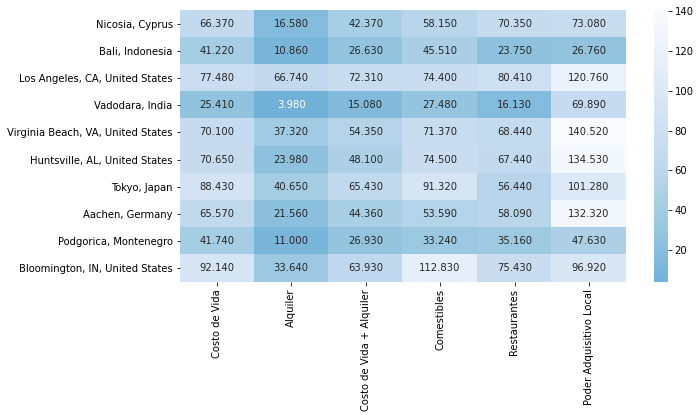

In [56]:
## FIX ME PLEASE ##
df=round(life_cost.groupby("city").mean()[redable_index_names],2)
datos = pd.DataFrame(data = df, columns = redable_index_names,index = my_cities).rename(columns = redable_index_names)
plt.figure(figsize=(10,5))
sns.heatmap(datos, center=0, cmap='Blues_r', annot=True, fmt='.3f')

### Ejercicio 3.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [57]:
paises=[]
for pais in life_cost["city"]:
    paises.append(pais.split(',')[1])
life_cost["country"] = paises
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index       country  
0                         69.79       Bermuda  
1                        130.21   Switzerland  
2                          9.73     Venezuela  
3                        133.91   Switzerland  
4                        132.41        Norway

In [58]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values
my_countries

array([' Syria', ' Jamaica', ' NV', ' Mexico', ' New Zealand', ' Nigeria',
       ' Jordan', ' Netherlands', ' Slovenia', ' IL', ' Kyrgyzstan',
       ' Georgia', ' MI', ' Namibia', ' GA', ' Montenegro', ' Indonesia',
       ' Argentina', ' FL', ' Egypt'], dtype=object)

In [59]:
## FIX ME PLEASE ##
import altair as alt
datos_2020=life_cost[life_cost["year"]==2020]
datos_2020=datos_2020[datos_2020.country.isin(my_countries)] 
alt.Chart(datos_2020).mark_circle(size=150).encode(
    x='groceries_index',
    y='local_purchasing_power_index',
    color = alt.Color("country",scale = alt.Scale(scheme="category20"))
).interactive() 

alt.Chart(...)

¿Qué comentarios puedes entregar al comparar los países seleccionados?

Los paises tienden a tener un mayor poder adquisitivo a medida que tienen un mayor indice de comestible y viceversa.

### Ejercicio 3.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [60]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [61]:
life_cost = pd.merge(life_cost,countries,how='left',on = "country")
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index       country continent  
0                         69.79       Bermuda       NaN  
1                        130.21   Switzerland       NaN  
2                          9.73     Venezuela       NaN  
3                        133.91   Switzerland       NaN  
4                        132.41        Norway       NaN

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

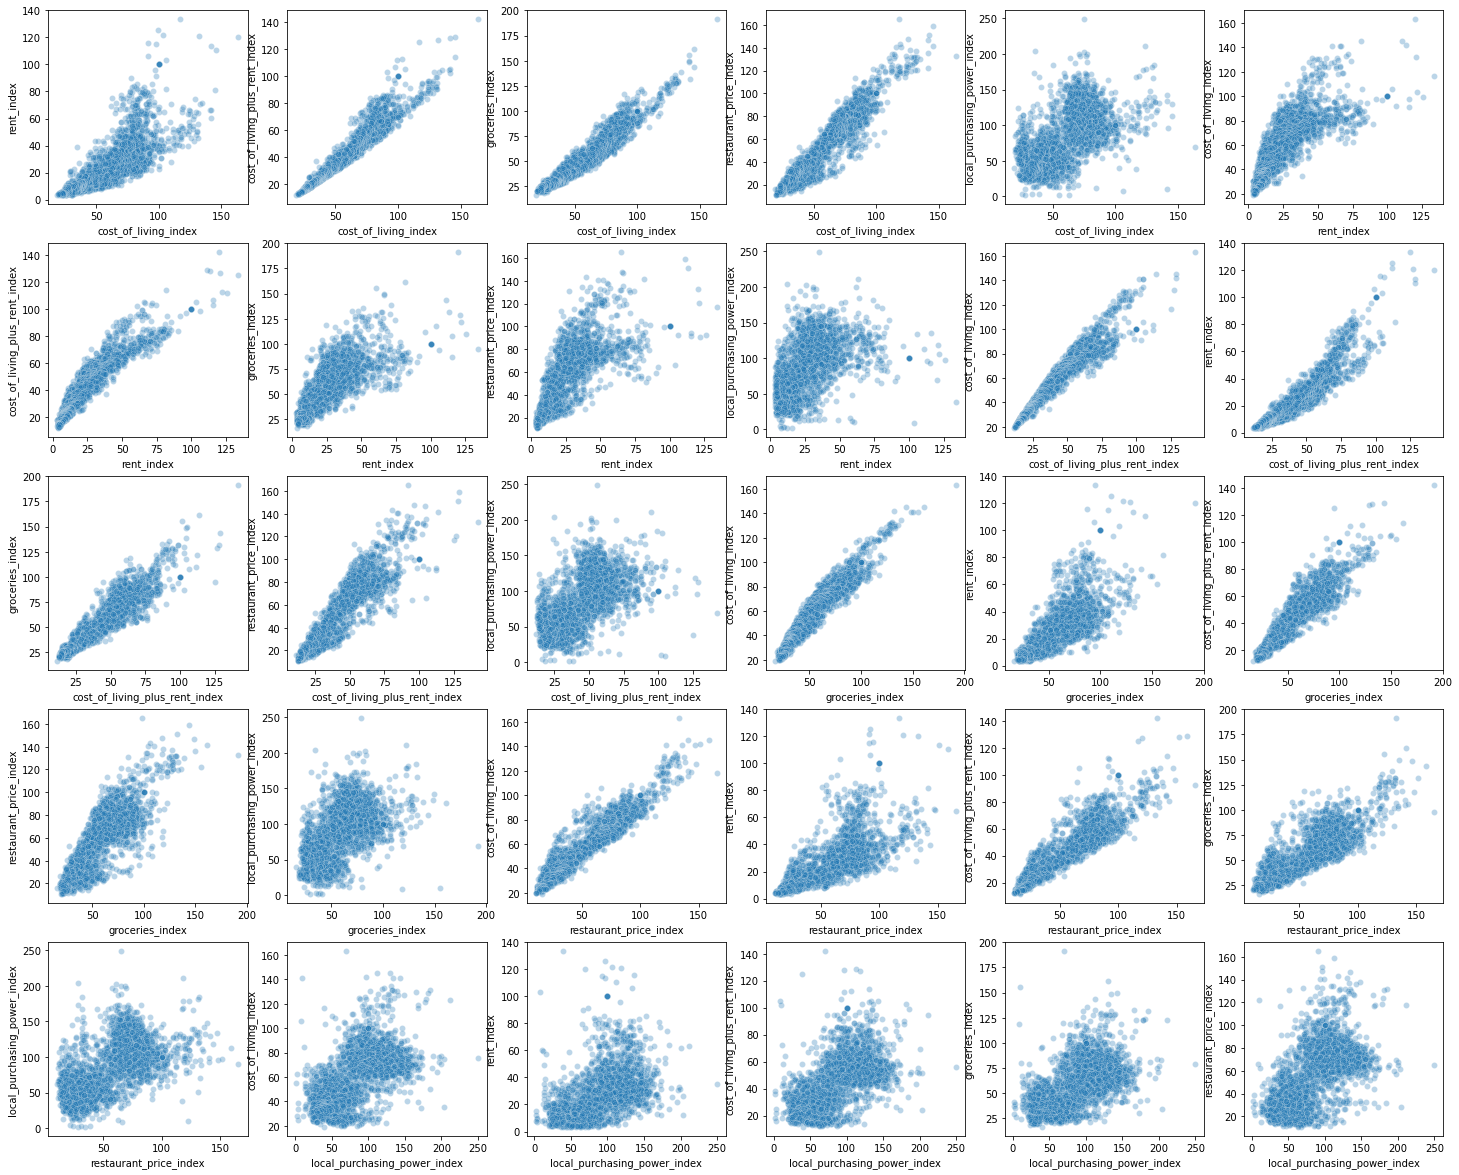

In [62]:
i=1
variables = ["cost_of_living_index","rent_index","cost_of_living_plus_rent_index","groceries_index","restaurant_price_index","local_purchasing_power_index"]
plt.figure(figsize=(25,25))
for variable_1 in variables:
    for variable_2 in variables:
        if variable_1 != variable_2:
            plt.subplot(6,6,i)
            sns.scatterplot(x = variable_1,y=variable_2, data = life_cost, hue = "continent",alpha=0.3)
            i=i+1